In [ ]:
from google.colab import files
files.upload()

Saving CARS.csv to CARS (1).csv


{'CARS.csv': b'\xef\xbb\xbfMake,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length\nAcura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6,265,17,23,4451,106,189\nAcura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2,4,200,24,31,2778,101,172\nAcura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183\nAcura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186\nAcura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197\nAcura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6,225,18,24,3893,115,197\nAcura,NSX coupe 2dr manual S,Sports,Asia,Rear,"$89,765","$79,978",3.2,6,290,17,24,3153,100,174\nAudi,A4 1.8T 4dr,Sedan,Europe,Front,"$25,940","$23,508",1.8,4,170,22,31,3252,104,179\nAudi,A41.8T convertible 2dr,Sedan,Europe,Front,"$35,940","$32,506",1.8,4,170,23,30,3638,105,180\nAudi,A4 3.0 4dr,Sedan,Europe,Front,"$31,840","$28,846",3,6,220,20,28

In [ ]:
!ls

'CARS (1).csv'	 CARS.csv   sample_data


In [ ]:
# Importing the required libraries
import pandas as pd 
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set# Importing the required libraries
import pandas as pd 
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [ ]:
# Loading the CSV file into a pandas dataframe.
df = pd.read_csv("CARS.csv")
df.head(5)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [ ]:
# Removing irrelevant features
df = df.drop(['Model','DriveTrain','Invoice', 'Origin', 'Type'], axis=1)
df.head(5)


,Make,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,"$36,945",3.5,6.0,265,17,23,4451,106,189
1,Acura,"$23,820",2.0,4.0,200,24,31,2778,101,172
2,Acura,"$26,990",2.4,4.0,200,22,29,3230,105,183
3,Acura,"$33,195",3.2,6.0,270,20,28,3575,108,186
4,Acura,"$43,755",3.5,6.0,225,18,24,3880,115,197


In [ ]:
# To identify the type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   MSRP         428 non-null    object 
 2   EngineSize   428 non-null    float64
 3   Cylinders    426 non-null    float64
 4   Horsepower   428 non-null    int64  
 5   MPG_City     428 non-null    int64  
 6   MPG_Highway  428 non-null    int64  
 7   Weight       428 non-null    int64  
 8   Wheelbase    428 non-null    int64  
 9   Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 33.6+ KB


In [ ]:
# Getting the number of instances and features
df.shape

(428, 10)

In [ ]:
# Getting the dimensions of the data frame
df.ndim

2

In [ ]:
df = df.drop_duplicates(subset='MSRP', keep='first')
df.count()

Make           410
MSRP           410
EngineSize     410
Cylinders      408
Horsepower     410
MPG_City       410
MPG_Highway    410
Weight         410
Wheelbase      410
Length         410
dtype: int64

In [ ]:
# Finding the null values
print(df.isnull().sum())

Make           0
MSRP           0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64


In [56]:
df.Horsepower.max()


500

In [ ]:
# Printing the null value rows
df[240:242]

,Make,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
247,Mazda,"$25,700",1.3,NaN,197,18,25,3053,106,174
248,Mazda,"$27,200",1.3,NaN,238,18,24,3029,106,174


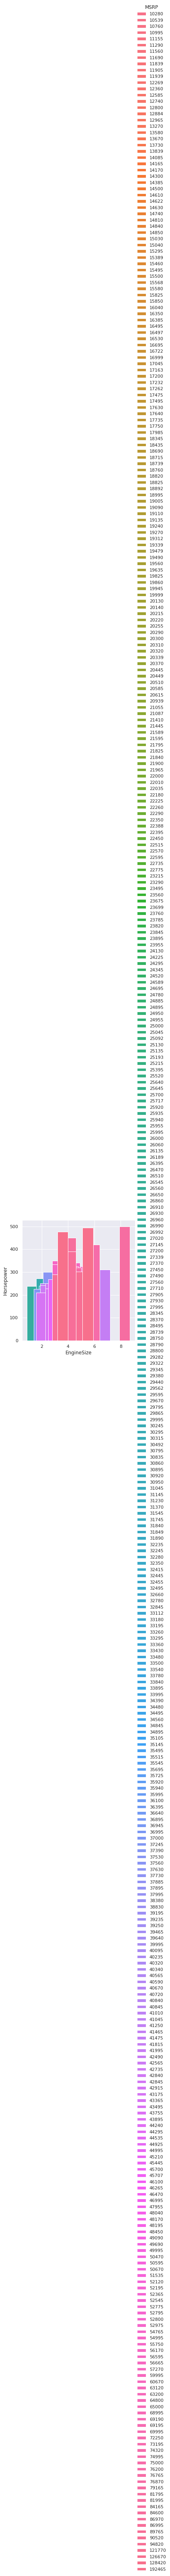

In [57]:
sns.FacetGrid(df, hue='MSRP', height=5).map(plt.bar, 'EngineSize', 'Horsepower').add_legend()

In [ ]:
# Filling the rows with the mean of the column
val = df['Cylinders'].mean()
df['Cylinders'][247] = round(val)
val = df['Cylinders'].mean()
df['Cylinders'][248]= round(val)


<ipython-input-19-d9e0250049dd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cylinders'][248]= round(val)


In [ ]:
# Removing the formatting
df['MSRP'] = [x.replace('$', '') for x in df['MSRP']] 
df['MSRP'] = [x.replace(',', '') for x in df['MSRP']]
df['MSRP']=pd.to_numeric(df['MSRP'],errors='coerce')

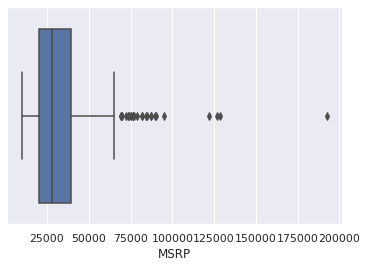

In [ ]:
sns.boxplot(x=df['MSRP'])


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)


In [ ]:
IQR = Q3 - Q1
print(IQR)

MSRP           19086.50
EngineSize         1.55
Cylinders          2.00
Horsepower        85.00
MPG_City           4.00
MPG_Highway        5.00
Weight           872.25
Wheelbase          9.00
Length            16.00
dtype: float64


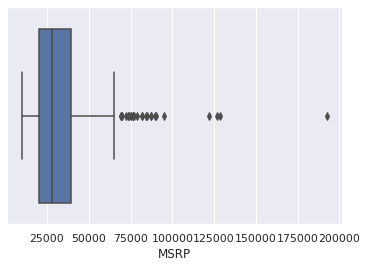

In [ ]:
sns.boxplot(x=df['MSRP'])


In [ ]:
df.describe()


,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,32919.021951,3.200976,5.824390,216.007317,20.039024,26.792683,3581.221951,108.168293,186.368293
std,19628.241002,1.115264,1.556873,72.330689,5.280720,5.790004,766.396651,8.365634,14.416388
min,10280.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20324.750000,2.325000,4.000000,165.000000,17.000000,24.000000,3102.000000,103.000000,178.000000
50%,27807.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3476.000000,107.000000,187.000000
75%,39411.250000,3.875000,6.000000,250.000000,21.000000,29.000000,3974.250000,112.000000,194.000000
max,192465.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


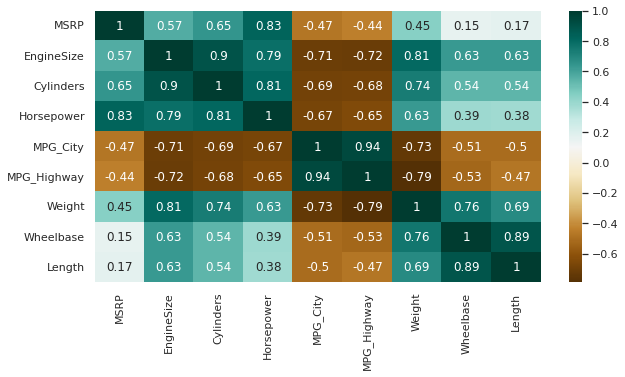

In [ ]:
# Plotting a heat map
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

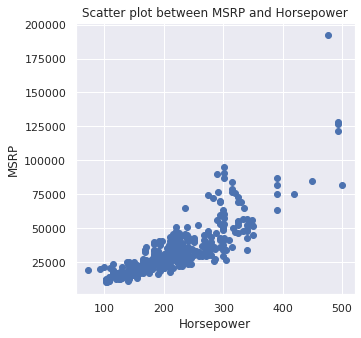

In [ ]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['Horsepower'], df['MSRP'])
plt.title('Scatter plot between MSRP and Horsepower')
ax.set_xlabel('Horsepower')
ax.set_ylabel('MSRP')
plt.show()

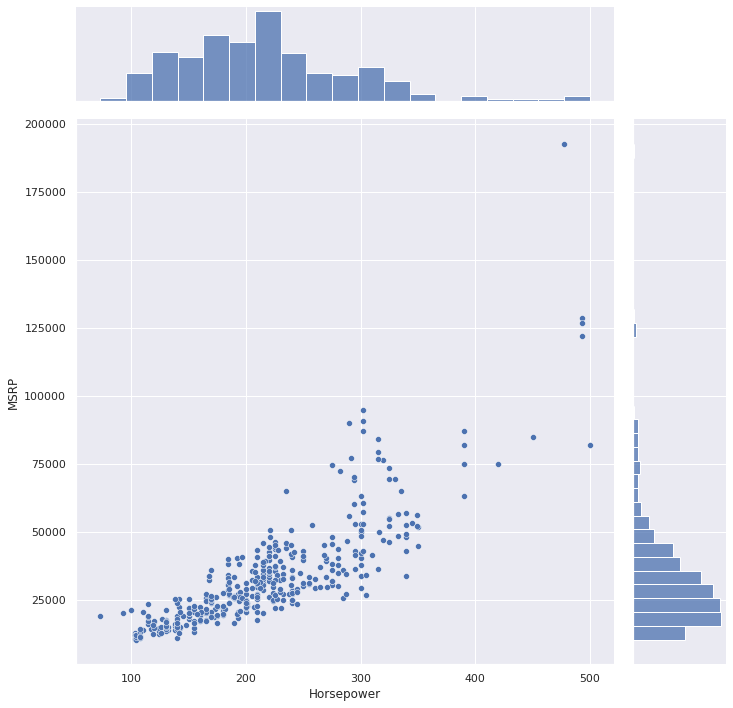

In [ ]:
sns.jointplot(x='Horsepower', y='MSRP', data=df, height=10)

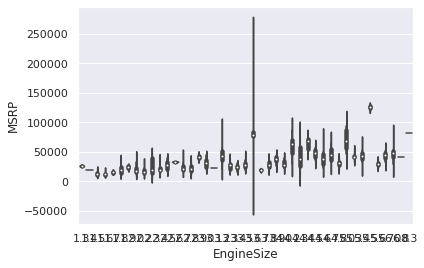

In [ ]:
sns.violinplot(x='EngineSize', y='MSRP', data=df, height=6)


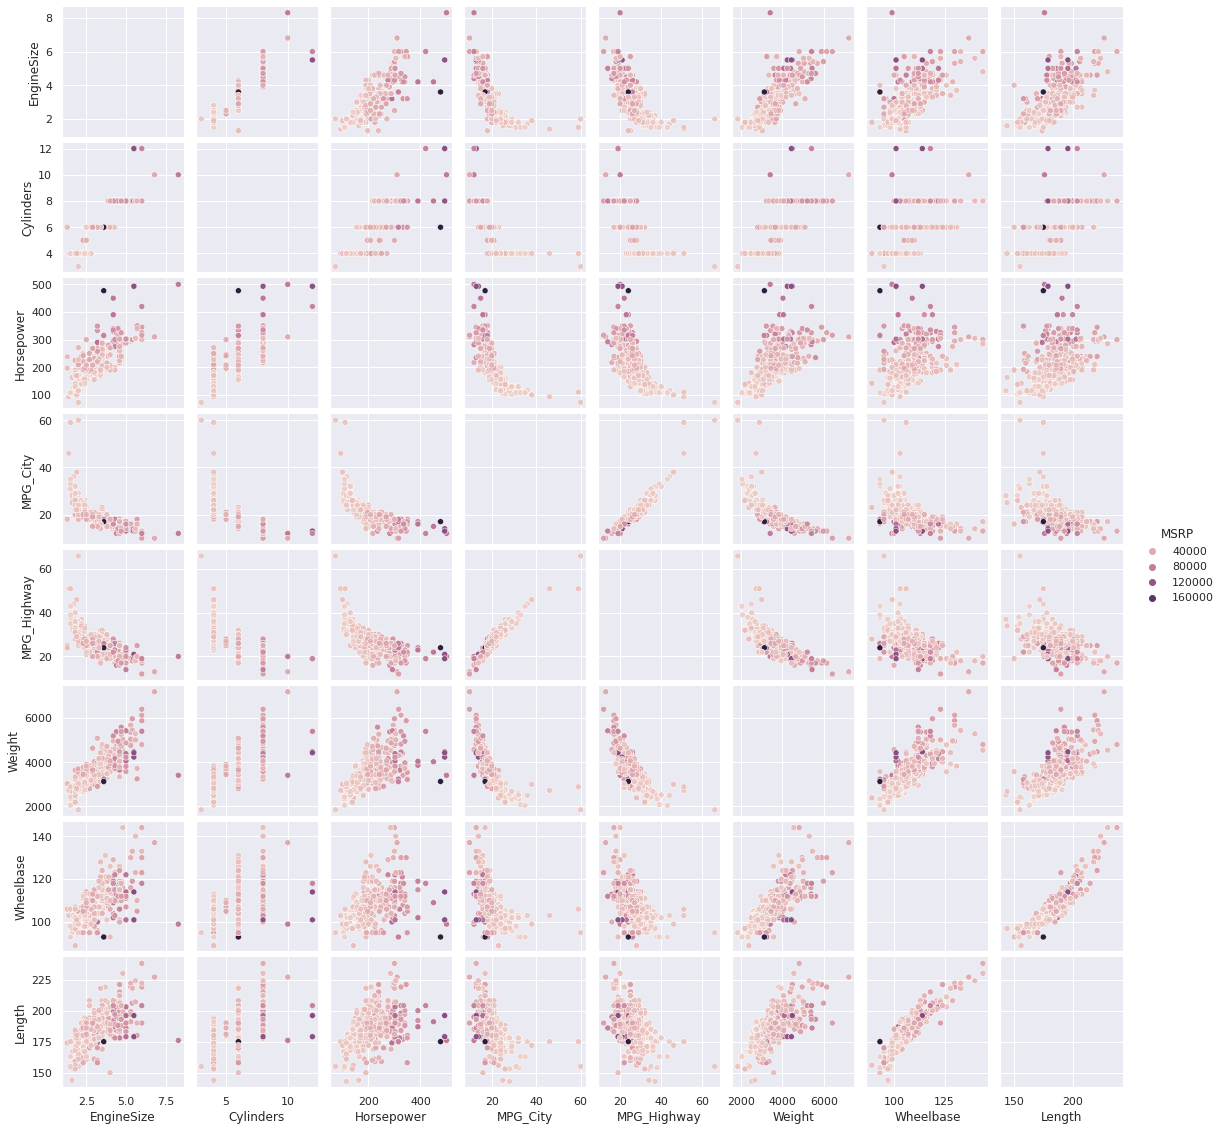

In [ ]:
sns.pairplot(df, hue='MSRP', height=2)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90d6d84670>,
      dtype=object)

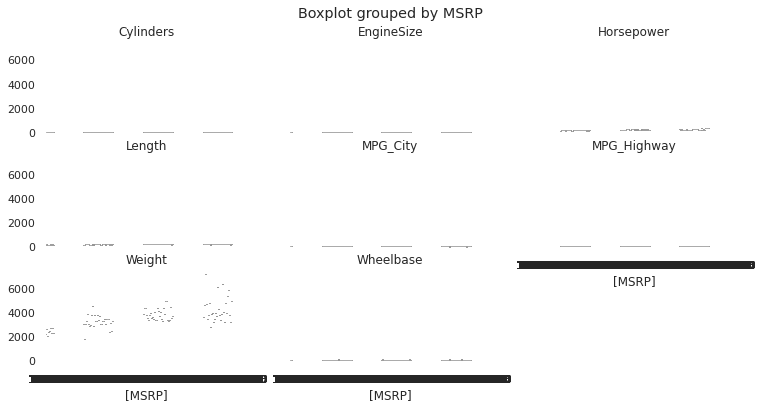

In [ ]:
df.boxplot(by='MSRP', figsize=(12, 6))